In [1]:
def random_dag(sommets, proba):
    # Créer un graphe orienté vide
    G = DiGraph()
    
    # Ajouter les sommets
    G.add_vertices(range(sommets))
    
    # Ajouter des arêtes aléatoires tout en vérifiant l'acyclicité
    for u in range(sommets):
        for v in range(u + 1,sommets): 
            if random() < proba:  
                G.add_edge(u, v)  
    return G

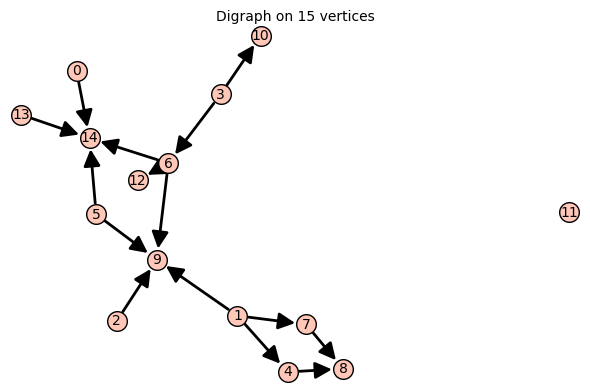

In [2]:
dag1 = random_dag(15,0.2)
dag1

In [3]:
def soustraction(n,d):
   
    G = DiGraph()
    
    G.add_vertices(range(n+1))
    
    for u in reversed(range(0,n+1)):
        if u-d>0:
            for v in range(u-d,u):  
                G.add_edge(u, v)  
        else :
            for v in range(0,u):  
                G.add_edge(u, v)  
    return G

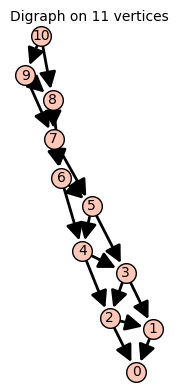

In [14]:
D=soustraction(10,2)
D

In [5]:
def N_DAG(dag): #retourne une coloration du noyau d'un dag
    
    dicolor={'red':[],'green':[]}              # Dictionnaire pour classer les sommet en fonction de leur couleur "
    
    dag_copy=dag.copy()                        #copie du dag etudié
    
    while len(dag_copy.vertices())>0:          #tant que tout les sommets ne sont pas traité :
        b=[]
        for i in dag_copy.vertices():
            if dag_copy.out_degree(i)==0:
                dicolor['red'].append(i)              #Colorier les puits en rouge ( sommets du noyau )
                b.append(i)
                for j in dag_copy[i]:
                        dicolor['green'].append(j)     #Colorier le predecesseur de puit en vert ( sommets hors noyau)
                        b.append(j)
                        
        bi=list(set(b))            
        for h in bi :
            dag_copy.delete_vertex(h)          #nouveaux dag sans les sommets déjà coloriés
   
    show=dag.show(vertex_colors=dicolor)
    return show       



In [6]:
def dic_DAG(dag): #retourne une coloration du noyau d'un dag
    
    dicolor={'red':[],'green':[]}              # Dictionnaire pour classer les sommet en fonction de leur couleur "
    
    dag_copy=dag.copy()                        #copie du dag etudié
    
    while len(dag_copy.vertices())>0:          #tant que tout les sommets ne sont pas traité :
        b=[]
        for i in dag_copy.vertices():
            if dag_copy.out_degree(i)==0:
                dicolor['red'].append(i)              #Colorier les puits en rouge ( sommets du noyau )
                b.append(i)
                for j in dag_copy[i]:
                        dicolor['green'].append(j)     #Colorier le predecesseur de puit en vert ( sommets hors noyau)
                        b.append(j)
                        
        bi=list(set(b))            
        for h in bi :
            dag_copy.delete_vertex(h)          #nouveaux dag sans les sommets déjà coloriés
   
    return dicolor     

{'red': [0, 3, 6, 9], 'green': [1, 2, 4, 5, 8, 7, 10]}


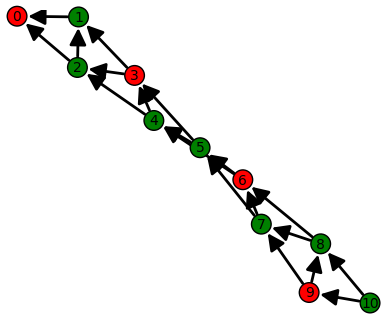

In [15]:
print(dic_DAG(soustraction(10,2)))
N_DAG(soustraction(10,2))

In [8]:
def shot(a,b,c,G):
    l=[]
    for i in range (1,a+1):
        l.append((a-i,b,c))
    for i in range (1,b+1):
        l.append((a,b-i,c))
    for i in range (1,c+1):
        l.append((a,b,c-i))
    for i in range(len(l)):
        G.add_vertex(l[i])
        G.add_edge((a,b,c),l[i])
    return G
    
def NIM(a,b,c):
    G=DiGraph()
    G.add_vertex((a,b,c))
    d=[]
    d.append((a,b,c))
    while d!=[(0,0,0)]:
        for i in G.vertices():
            if G.out_degree(i)==0:
                G=shot(i[0],i[1],i[2],G)
        d=[]
        for j in G.vertices():
            if G.out_degree(j)==0:
                d.append(j)
        
    return G

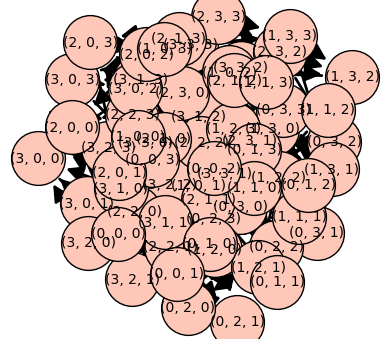

In [18]:
GG=NIM(3,3,3)
plot_options = {'vertex_size': 1500 }    
GG.show(**plot_options)

In [20]:
dic_DAG(GG)

{'red': [(0, 0, 0),
  (0, 1, 1),
  (1, 0, 1),
  (1, 1, 0),
  (0, 2, 2),
  (2, 0, 2),
  (2, 2, 0),
  (0, 3, 3),
  (1, 2, 3),
  (1, 3, 2),
  (2, 1, 3),
  (2, 3, 1),
  (3, 0, 3),
  (3, 1, 2),
  (3, 2, 1),
  (3, 3, 0)],
 'green': [(0, 2, 0),
  (0, 0, 2),
  (1, 0, 0),
  (0, 3, 0),
  (0, 0, 1),
  (3, 0, 0),
  (0, 1, 0),
  (2, 0, 0),
  (0, 0, 3),
  (1, 1, 1),
  (0, 3, 1),
  (3, 1, 1),
  (0, 1, 2),
  (0, 2, 1),
  (2, 1, 1),
  (0, 1, 3),
  (1, 2, 1),
  (1, 0, 3),
  (2, 0, 1),
  (3, 0, 1),
  (1, 1, 1),
  (1, 3, 1),
  (1, 0, 2),
  (1, 1, 1),
  (1, 3, 0),
  (2, 1, 0),
  (1, 1, 3),
  (1, 2, 0),
  (3, 1, 0),
  (1, 1, 2),
  (0, 3, 2),
  (2, 2, 2),
  (3, 2, 2),
  (1, 2, 2),
  (0, 2, 3),
  (3, 0, 2),
  (2, 2, 2),
  (2, 3, 2),
  (2, 0, 3),
  (2, 1, 2),
  (3, 2, 0),
  (2, 2, 2),
  (2, 3, 0),
  (2, 2, 1),
  (2, 2, 3),
  (3, 3, 3),
  (2, 3, 3),
  (1, 3, 3),
  (3, 2, 3),
  (1, 3, 3),
  (1, 3, 3),
  (3, 3, 2),
  (2, 3, 3),
  (3, 1, 3),
  (3, 3, 1),
  (2, 3, 3),
  (3, 3, 3),
  (3, 2, 3),
  (3, 1, 3),
  (3, 1,

In [11]:
N=NIM(2,3,5)

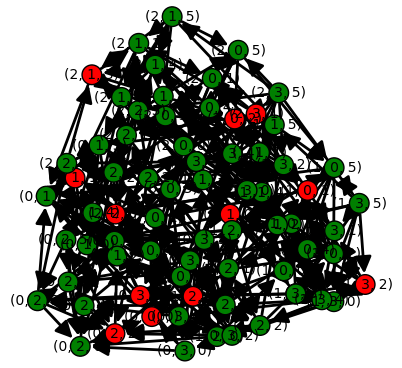

In [12]:
N_DAG(N)

In [13]:
dic_DAG(N)

{'red': [(0, 0, 0),
  (0, 1, 1),
  (1, 0, 1),
  (1, 1, 0),
  (0, 2, 2),
  (2, 0, 2),
  (2, 2, 0),
  (0, 3, 3),
  (1, 2, 3),
  (1, 3, 2),
  (2, 1, 3),
  (2, 3, 1)],
 'green': [(0, 2, 0),
  (0, 0, 2),
  (0, 3, 0),
  (1, 0, 0),
  (0, 0, 1),
  (0, 0, 5),
  (0, 0, 4),
  (0, 1, 0),
  (2, 0, 0),
  (0, 0, 3),
  (0, 2, 1),
  (0, 1, 2),
  (2, 1, 1),
  (0, 3, 1),
  (0, 1, 3),
  (0, 1, 4),
  (1, 1, 1),
  (0, 1, 5),
  (1, 2, 1),
  (1, 0, 3),
  (1, 0, 4),
  (1, 0, 5),
  (1, 3, 1),
  (2, 0, 1),
  (1, 1, 1),
  (1, 0, 2),
  (1, 1, 1),
  (2, 1, 0),
  (1, 1, 3),
  (1, 1, 2),
  (1, 3, 0),
  (1, 1, 5),
  (1, 2, 0),
  (1, 1, 4),
  (0, 3, 2),
  (2, 2, 2),
  (0, 2, 5),
  (1, 2, 2),
  (0, 2, 3),
  (0, 2, 4),
  (2, 2, 2),
  (2, 0, 4),
  (2, 3, 2),
  (2, 0, 3),
  (2, 1, 2),
  (2, 0, 5),
  (2, 2, 2),
  (2, 2, 5),
  (2, 3, 0),
  (2, 2, 1),
  (2, 2, 3),
  (2, 2, 4),
  (0, 3, 5),
  (0, 3, 4),
  (2, 3, 3),
  (1, 3, 3),
  (1, 3, 3),
  (1, 2, 5),
  (1, 2, 4),
  (1, 3, 5),
  (1, 3, 3),
  (1, 3, 4),
  (2, 1, 4),
  (2, 3,